### 利用數據與視覺化圖形來探索顧客行為，透過各類指標與顧客購買產品相互關係的比較，了解影響顧客購買產品的驅動因素。

In [291]:
# Load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6) 

Populating the interactive namespace from numpy and matplotlib


In [292]:
# to customize the displayed area of the dataframe 
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



### 載入資料

In [293]:
df = pd.read_csv("/Users/bicc/Documents/kyo/kaggle/train_ver2.csv",
                           dtype={"sexo":str, "ind_nuevo":str, 
                                  "ult_fec_cli_1t":str, 
                                  "indext":str}, nrows=7e6) 
unique_ids = pd.Series(df["ncodpers"].unique())

/Users/bicc/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### show出不重覆的id

In [294]:
unique_ids

0         1375586
1         1050611
2         1050612
3         1050613
4         1050614
5         1050615
6         1050616
7         1050617
8         1050619
9         1050620
10        1050621
11        1050622
12        1050623
13        1050624
14        1050625
15        1050626
16        1050610
17        1050627
18        1050609
19        1050605
20        1050582
21        1050586
22        1050588
23        1050589
24        1050591
25        1050592
26        1050595
27        1050596
28        1050597
29        1050598
30        1050599
31        1050601
32        1050602
33        1050603
34        1050604
35        1050607
36        1050580
37        1050628
38        1050630
39        1050669
40        1050670
41        1050676
42        1050679
43        1050680
44        1050686
45        1050688
46        1050693
47        1050694
48        1050697
49        1050703
50        1050704
51        1050706
52        1050707
53        1050710
54        1050663
55        

### 抽樣130000資料

In [295]:
unique_id = unique_ids.sample(n=130000)
df = df[df.ncodpers.isin(unique_id)]

In [296]:
df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
25,2015-01-28,1050592,N,ES,H,22,2012-08-10,0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,31.0,NAVARRA,0.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
26,2015-01-28,1050595,N,ES,V,25,2012-08-10,0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,5.0,AVILA,1.0,86863.38,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
28,2015-01-28,1050597,N,ES,H,23,2012-08-10,0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,45.0,TOLEDO,0.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
29,2015-01-28,1050598,N,ES,H,23,2012-08-10,0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,45.0,TOLEDO,1.0,90408.75,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
33,2015-01-28,1050603,N,ES,H,23,2012-08-10,0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,131351.94,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
50,2015-01-28,1050704,N,ES,V,23,2012-08-10,0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,8.0,BARCELONA,0.0,72880.80,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
53,2015-01-28,1050710,N,ES,H,23,2012-08-10,0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,3.0,ALICANTE,0.0,132398.40,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
116,2015-01-28,1050556,N,ES,H,23,2012-08-10,0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,49.0,ZAMORA,1.0,134770.20,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
117,2015-01-28,1050557,N,ES,H,27,2012-08-10,0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,28.0,MADRID,0.0,124518.48,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


### 計算總筆數

In [297]:
# Records count
df["ncodpers"].count()

1007055

### 轉換為數值變數

# pandas.to_numeric
## arg
### list, tuple, 1-d array, or Series
## errors
### If ‘raise’, then invalid parsing will raise an exception
### If ‘coerce’, then invalid parsing will be set as NaN
### If ‘ignore’, then invalid parsing will return the input

In [298]:
# Change datatype
df["age"]   = pd.to_numeric(df["age"], errors="coerce") 
df["antiguedad"]   = pd.to_numeric(df["antiguedad"], errors="coerce") 
df["indrel_1mes"]   = pd.to_numeric(df["indrel_1mes"], errors="coerce") 

### 遺失值加總

In [299]:
# Check how many missing values in every column
df.isnull().sum()

fecha_dato                     0
ncodpers                       0
ind_empleado                3728
pais_residencia             3728
sexo                        3728
age                         3728
fecha_alta                  3728
ind_nuevo                   3728
antiguedad                  3728
indrel                      3728
ult_fec_cli_1t           1005457
indrel_1mes                14950
tiprel_1mes                14906
indresi                     3728
indext                      3728
conyuemp                 1006904
canal_entrada              16929
indfall                     3728
tipodom                     3728
cod_prov                    8826
nomprov                     8826
ind_actividad_cliente       3728
renta                     180203
segmento                   17106
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_f

### 將全部都是遺失值的去除

In [300]:
# Drop the columns with majority of missing values
df = df.drop(["ult_fec_cli_1t", "conyuemp"], axis=1) 

## 處理遺失值

In [301]:
#Impute missing values in the income column 
grouped = df.groupby("nomprov").agg({"renta":lambda x: x.median(skipna=True)}).reset_index()
new_incomes = pd.merge(df,grouped,how="inner",on="nomprov").loc[:, ["nomprov","renta_y"]]
new_incomes = new_incomes.rename(columns={"renta_y":"renta"}).sort_values("renta").sort_values("nomprov")
df.sort_values("nomprov",inplace=True)
df = df.reset_index()
new_incomes = new_incomes.reset_index()
df.loc[df.renta.isnull(),"renta"] = new_incomes.loc[df.renta.isnull(),"renta"].reset_index()
df.loc[df.renta.isnull(),"renta"] = df.loc[df.renta.notnull(),"renta"].median()
df.sort_values(by="fecha_dato",inplace=True)

### 去除任何有遺失值列

In [302]:
df = df.dropna(axis=0)

### 年資小於0直接為0

In [303]:
df[df["antiguedad"]<0] = 0

### 計算顧客的持有產品的總數

In [304]:
# Add a new column of the total number of products per customer per month
df["tot_products"] = df.loc[:,"ind_ahor_fin_ult1":"ind_recibo_ult1"].sum(axis=1)
df["tot_products"]   = pd.to_numeric(df["tot_products"], errors="coerce") 

### 觀看顧客的居住地

In [305]:
df['pais_residencia'].describe()

count     984807
unique         3
top           ES
freq      984788
Name: pais_residencia, dtype: object

In [306]:
df = df.loc[lambda df: df.pais_residencia == "ES", :]

### 工作的狀態（只篩選非員工“Ｎ”）

In [307]:
df['ind_empleado'].value_counts()

N    984017
B       312
A       249
F       210
Name: ind_empleado, dtype: int64

In [308]:
df = df.loc[lambda df: df.ind_empleado == "N", :]

### Data Visualization

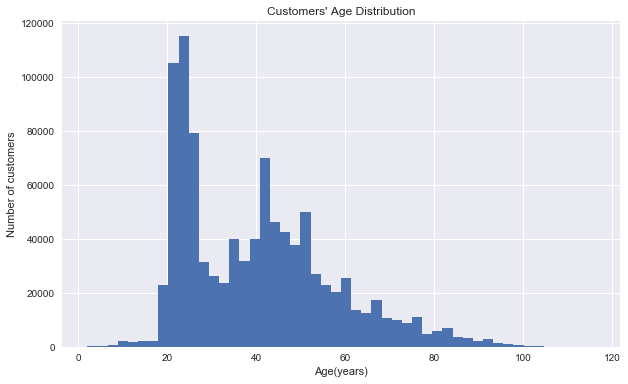

In [309]:
df['age'].hist(bins=50)
plt.title("Customers' Age Distribution")
plt.xlabel("Age(years)")
plt.ylabel("Number of customers") 

### 顧客前15個使用的通路

In [310]:
# Customers count by channel 
df['canal_entrada'].value_counts().head(15)

KHE    327936
KAT    249630
KFC    232835
KFA     30669
KHK     17040
KHQ     11309
KHD      9011
KAS      6596
KAG      5574
RED      5224
KAY      5065
KAB      4587
KHM      4237
KAA      4060
KHN      3735
Name: canal_entrada, dtype: int64

### 找出主要的通路

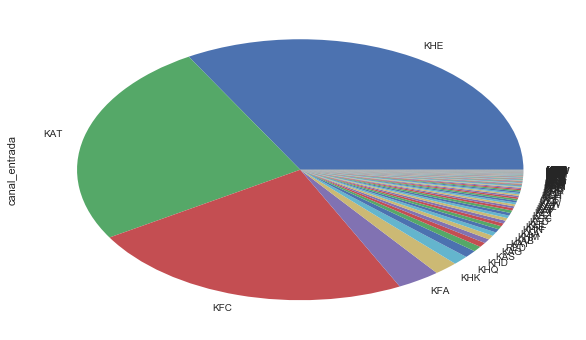

In [311]:
df["canal_entrada"].value_counts().plot(x=None, y=None, kind='pie') 

### 製作性別與活躍程度的Pivot Table

In [312]:
df_a = df.loc[:, ['sexo', 'ind_actividad_cliente']].join(df.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"])
df_a = df_a.groupby(['sexo', 'ind_actividad_cliente']).sum()
df_a = df_a.T

In [313]:
df_a.head()

sexo                          H                   V          
ind_actividad_cliente       0.0       1.0       0.0       1.0
ind_ahor_fin_ult1           0.0      30.0       7.0      70.0
ind_aval_fin_ult1           0.0       9.0       0.0      23.0
ind_cco_fin_ult1       173169.0  151196.0  162505.0  207757.0
ind_cder_fin_ult1           9.0      73.0      66.0     322.0
ind_cno_fin_ult1          496.0   34349.0     658.0   51029.0

### 利用直方圖畫出男女在各產品的人數

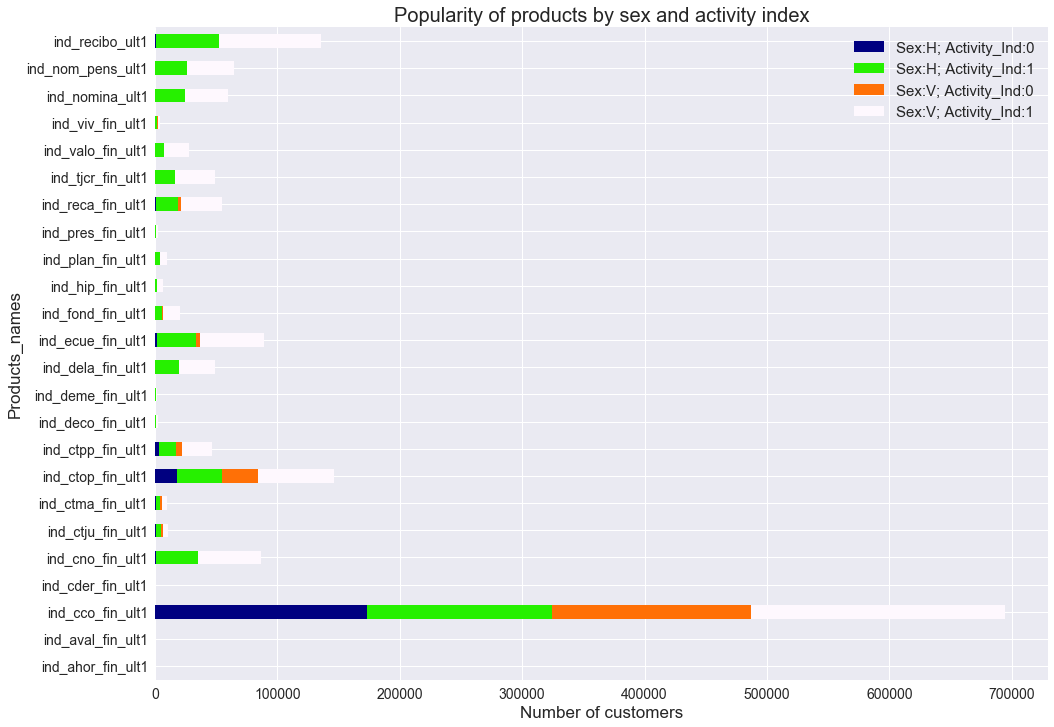

In [314]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by sex and activity index', fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':15}) 

### 去除活存帳戶，來觀看其他產品的比率

In [315]:
# excluding the dominant product 
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

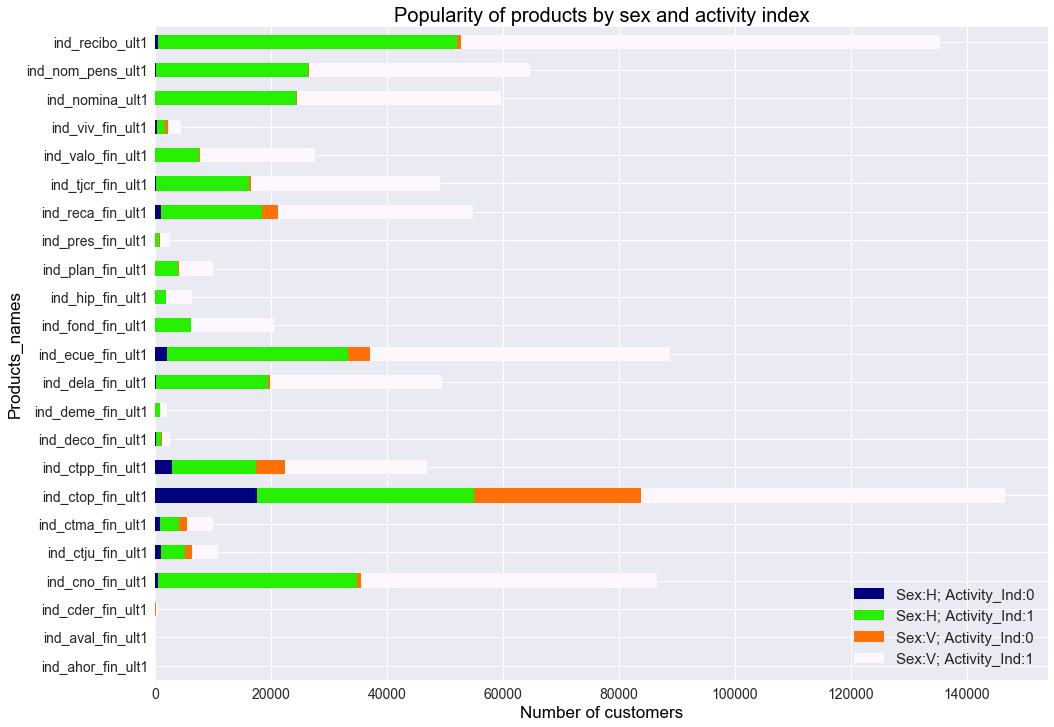

In [316]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_ncar')
plt.title('Popularity of products by sex and activity index', fontsize=20, color='black') 
plt.xlabel('Number of customers', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':15}) 

男性在其他產品數量較多

### 每位顧客持有的商品數統計

In [317]:
df["tot_products"].value_counts()

1.0     552530
2.0     150950
0.0     120166
3.0      62106
4.0      35979
5.0      23082
6.0      17182
7.0      11452
8.0       6197
9.0       2728
10.0      1134
11.0       390
12.0        98
13.0        16
15.0         7
Name: tot_products, dtype: int64

大多數客戶使用一兩個產品，很少使用五個以上的產品。

### 找出哪個年紀持有本行產品最多

In [318]:
df_a = df.groupby(['age'])['tot_products'].agg('sum')

In [319]:
df_a.sort_values(ascending=False).head(20)

age
23.0    60845.0
24.0    54858.0
22.0    53892.0
44.0    52013.0
45.0    50711.0
43.0    50158.0
42.0    49453.0
46.0    47502.0
47.0    46070.0
21.0    44791.0
41.0    44510.0
48.0    43222.0
40.0    41593.0
49.0    39673.0
50.0    37122.0
39.0    36145.0
51.0    34468.0
25.0    34388.0
52.0    33925.0
38.0    31807.0
Name: tot_products, dtype: float64

### 畫出年紀對於產品持有的總數

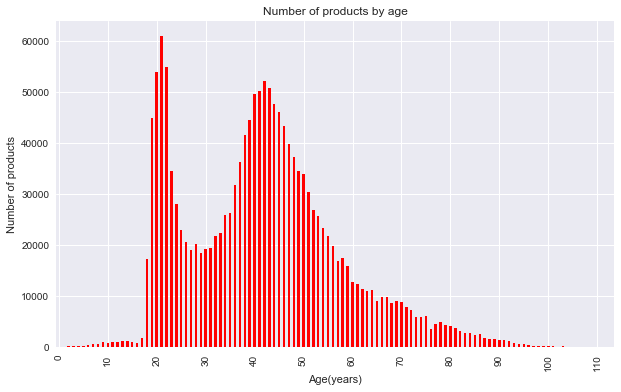

In [320]:
# Number of products by age 
df_a.plot(kind='bar', colormap='autumn', legend=None) 
plt.xticks(np.arange(0, 120, 10), [str(x) for x in np.arange(0, 120, 10)])
plt.title('Number of products by age') 
plt.xlabel('Age(years)') 
plt.ylabel('Number of products') 

### VIP、個人戶、畢業生，持有產品的總數

In [321]:
df_a = df.groupby(['segmento'])['tot_products'].agg('sum') 
df_a

segmento
01 - TOP               185403.0
02 - PARTICULARES     1004690.0
03 - UNIVERSITARIO     384484.0
Name: tot_products, dtype: float64

01 - VIP, 02 - Individuals 03 - college graduated

PARTICULARES（02 - Individuals）為最重要的顧客群

### 近六個月的加入的顧客的產品總數

In [322]:
df_a = df.groupby(['ind_nuevo'])['tot_products'].agg('count') 
df_a

ind_nuevo
 0    956126
 1     27891
Name: tot_products, dtype: int64

超過半年前加入的顧客產品總數還是佔絕大部分

### 定期往來顧客產品總數

In [323]:
df_a = df.groupby(['indrel'])['tot_products'].agg('count') 
df_a

indrel
1.0     982715
99.0      1302
Name: tot_products, dtype: int64

定期往來顧客的產品總數幾乎佔了全部

### 不同顧客類型持有產品數(1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner))

In [324]:
df_a = df.groupby(['indrel_1mes'])['tot_products'].agg('count') 
df_a

indrel_1mes
1.0    984013
3.0         4
Name: tot_products, dtype: int64

主要的顧客的產品數幾乎佔了全部

In [325]:
df_a = df.groupby(['tiprel_1mes'])['tot_products'].agg('count') 
df_a

tiprel_1mes
A    478348
I    505665
P         4
Name: tot_products, dtype: int64

顧客類型：A（主動），I（不主動），P（前客戶），R（潛在）

幾乎都是活躍及不活躍的顧客

### 居住在國外的產品數

In [326]:
df_a = df.groupby(['indext'])['tot_products'].agg('count') 
df_a

indext
N    943462
S     40555
Name: tot_products, dtype: int64

如果居住國與銀行所在國家相同，則為S（是），不同則為N（否）

### 製造一個收入的分群

In [327]:
df_a = (df.groupby(pd.cut(df['renta'], [0,60000,120000,180000,240000, pd.np.inf], right=False)).sum())

renta：家庭總收入

In [328]:
df_a["tot_products"]

renta
[0.0, 60000.0)          199162.0
[60000.0, 120000.0)     765261.0
[120000.0, 180000.0)    316335.0
[180000.0, 240000.0)    145814.0
[240000.0, inf)         148005.0
Name: tot_products, dtype: float64

### 各產品在不同收入分層中擁有的人數

In [329]:
# Let's drop the columns which are unnecessary for this step
df_a = df_a.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_a = df_a.T

In [330]:
df_a.head(10)

renta,"[0.0, 60000.0)","[60000.0, 120000.0)","[120000.0, 180000.0)","[180000.0, 240000.0)","[240000.0, inf)"
ind_ahor_fin_ult1,8.0,20.0,29.0,20.0,30.0
ind_aval_fin_ult1,0.0,15.0,8.0,9.0,0.0
ind_cco_fin_ult1,110555.0,363912.0,119974.0,50725.0,49461.0
ind_cder_fin_ult1,29.0,230.0,100.0,55.0,56.0
ind_cno_fin_ult1,10090.0,40612.0,19083.0,8353.0,8394.0
ind_ctju_fin_ult1,777.0,4765.0,2886.0,1273.0,1144.0
ind_ctma_fin_ult1,1174.0,4845.0,2192.0,999.0,814.0
ind_ctop_fin_ult1,14242.0,66229.0,32847.0,16546.0,16796.0
ind_ctpp_fin_ult1,3787.0,21405.0,10842.0,5421.0,5408.0
ind_deco_fin_ult1,288.0,1423.0,530.0,189.0,199.0


### 每個收入的級距與產品的分配比率

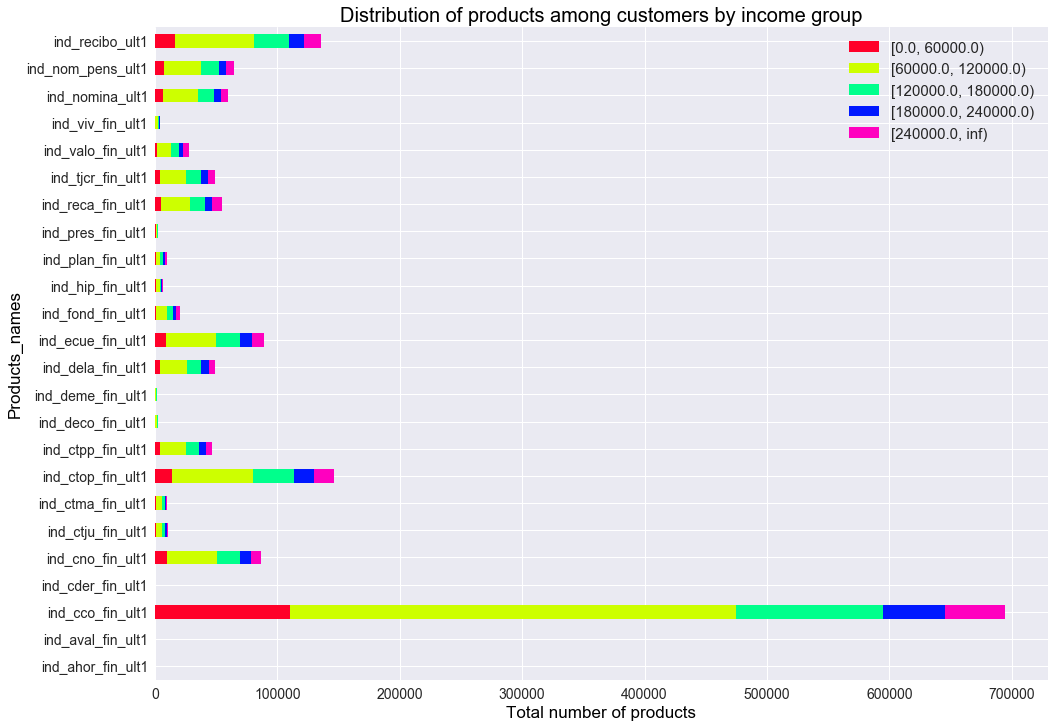

In [331]:
# Plot of product share for each income group
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Distribution of products among customers by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

### 去除活存帳戶，來觀看其他產品的比率

In [332]:
# exclude the dominant product "ind_cco_fin_ult1"
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

In [333]:
df_a.head()

renta,"[0.0, 60000.0)","[60000.0, 120000.0)","[120000.0, 180000.0)","[180000.0, 240000.0)","[240000.0, inf)"
ind_ahor_fin_ult1,8.0,20.0,29.0,20.0,30.0
ind_aval_fin_ult1,0.0,15.0,8.0,9.0,0.0
ind_cder_fin_ult1,29.0,230.0,100.0,55.0,56.0
ind_cno_fin_ult1,10090.0,40612.0,19083.0,8353.0,8394.0
ind_ctju_fin_ult1,777.0,4765.0,2886.0,1273.0,1144.0


### 每個收入的級距與產品的分配比率

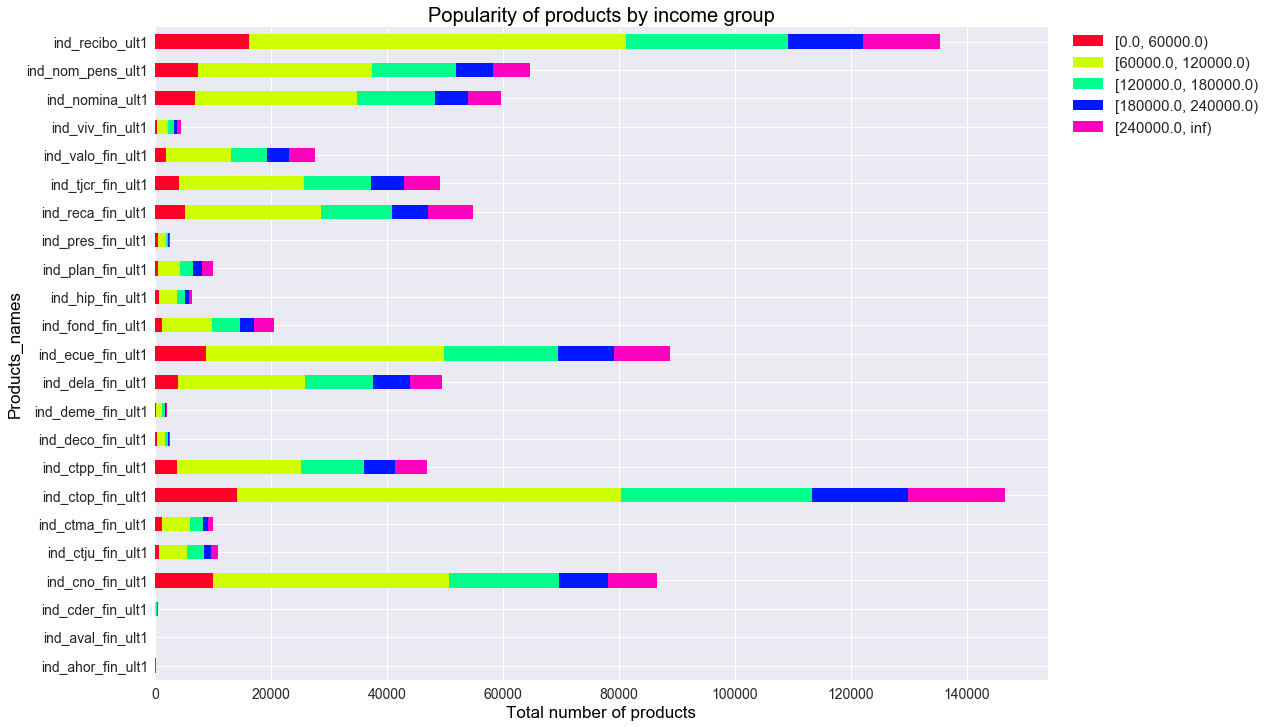

In [334]:
# Plot of product share for each income group; excluding the dominant product 
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Popularity of products by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15}) 

### 以Age分群

In [335]:
# Let's create age groups
df_a = (df.groupby(pd.cut(df['age'], [0,20,40,60,80,100, pd.np.inf], right=False))
                     .sum())

In [336]:
df_a

,index,ncodpers,age,antiguedad,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,tot_products
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"[0.0, 20.0)",41617976105,9438997880,168731.0,1062419.0,14766.0,12218.0,12218.0,332325.0,9135.0,1.741478e+09,0,0,816,0,0,10672,0,0,0,0,0,42,0,0,0,0,0,15,0,0,0,11.0,45.0,2,11603.0
"[20.0, 40.0)",1733346357527,528095069674,13193774.0,18613708.0,564659.0,490969.0,490963.0,12723700.0,189156.0,5.630634e+10,0,15,398563,43,29446,173,3448,15876,7935,794,257,5602,21626,1878,434,423,583,12332,8927,2936,855,19570.0,19956.0,45804,597476.0
"[40.0, 60.0)",1185299777330,185678613981,16569357.0,42247250.0,381284.0,346006.0,346004.0,9356061.0,216133.0,4.744717e+10,97,17,213360,279,48261,0,5169,87118,30810,1364,1372,28746,50429,12518,5497,7565,1635,35580,33254,18223,3390,36916.0,37707.0,75524,734831.0
"[60.0, 80.0)",363727493402,51489511109,7174858.0,13689901.0,116269.0,105881.0,105881.0,2915861.0,56413.0,1.608251e+10,10,0,65135,139,7903,0,1186,31880,6689,370,328,11765,14279,4877,535,1951,303,6120,6500,5315,205,3097.0,6254.0,12570,187411.0
"[80.0, 100.0)",96369926567,12364669648,2399229.0,3819981.0,32765.0,27865.0,27865.0,774133.0,13139.0,4.169837e+09,0,0,16239,9,922,0,219,11224,1409,101,98,3265,2480,1283,10,69,40,884,409,1050,39,49.0,780.0,1477,42056.0
"[100.0, inf)",4001566702,379071587,112243.0,171058.0,1870.0,1086.0,1086.0,30794.0,256.0,1.771470e+08,0,0,514,0,0,0,2,562,20,0,0,19,14,29,0,0,0,10,0,20,0,0.0,0.0,10,1200.0


### 保留產品的欄位

In [337]:
# Keep the products columns and discard the others
df_a = df_a.loc[:, "ind_ahor_fin_ult1": "ind_recibo_ult1"]
df_a = df_a.T

In [338]:
df_a.head(10)

age,"[0.0, 20.0)","[20.0, 40.0)","[40.0, 60.0)","[60.0, 80.0)","[80.0, 100.0)","[100.0, inf)"
ind_ahor_fin_ult1,0.0,0.0,97.0,10.0,0.0,0.0
ind_aval_fin_ult1,0.0,15.0,17.0,0.0,0.0,0.0
ind_cco_fin_ult1,816.0,398563.0,213360.0,65135.0,16239.0,514.0
ind_cder_fin_ult1,0.0,43.0,279.0,139.0,9.0,0.0
ind_cno_fin_ult1,0.0,29446.0,48261.0,7903.0,922.0,0.0
ind_ctju_fin_ult1,10672.0,173.0,0.0,0.0,0.0,0.0
ind_ctma_fin_ult1,0.0,3448.0,5169.0,1186.0,219.0,2.0
ind_ctop_fin_ult1,0.0,15876.0,87118.0,31880.0,11224.0,562.0
ind_ctpp_fin_ult1,0.0,7935.0,30810.0,6689.0,1409.0,20.0
ind_deco_fin_ult1,0.0,794.0,1364.0,370.0,101.0,0.0


### 畫出年齡與產品的長條圖

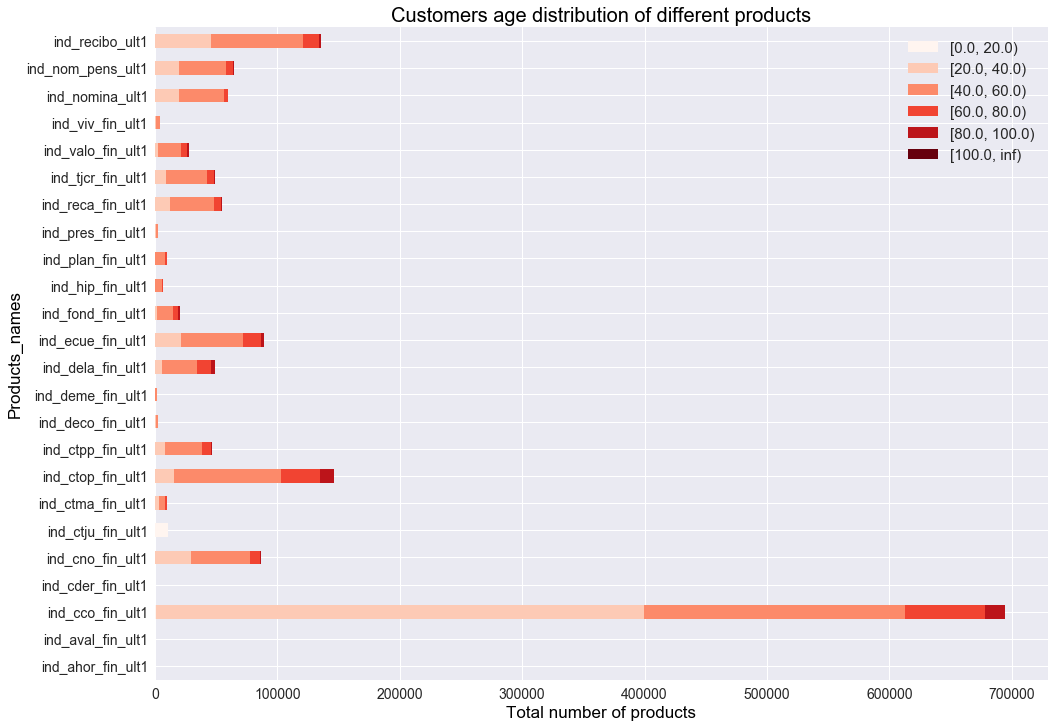

In [339]:
# Plot of customers' age distibution of each product 
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Reds')
plt.title('Customers age distribution of different products', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

### 去除活存帳戶

In [340]:
# exclude the dominant product "ind_cco_fin_ult1"
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

### 再次畫出年齡與產品的長條圖

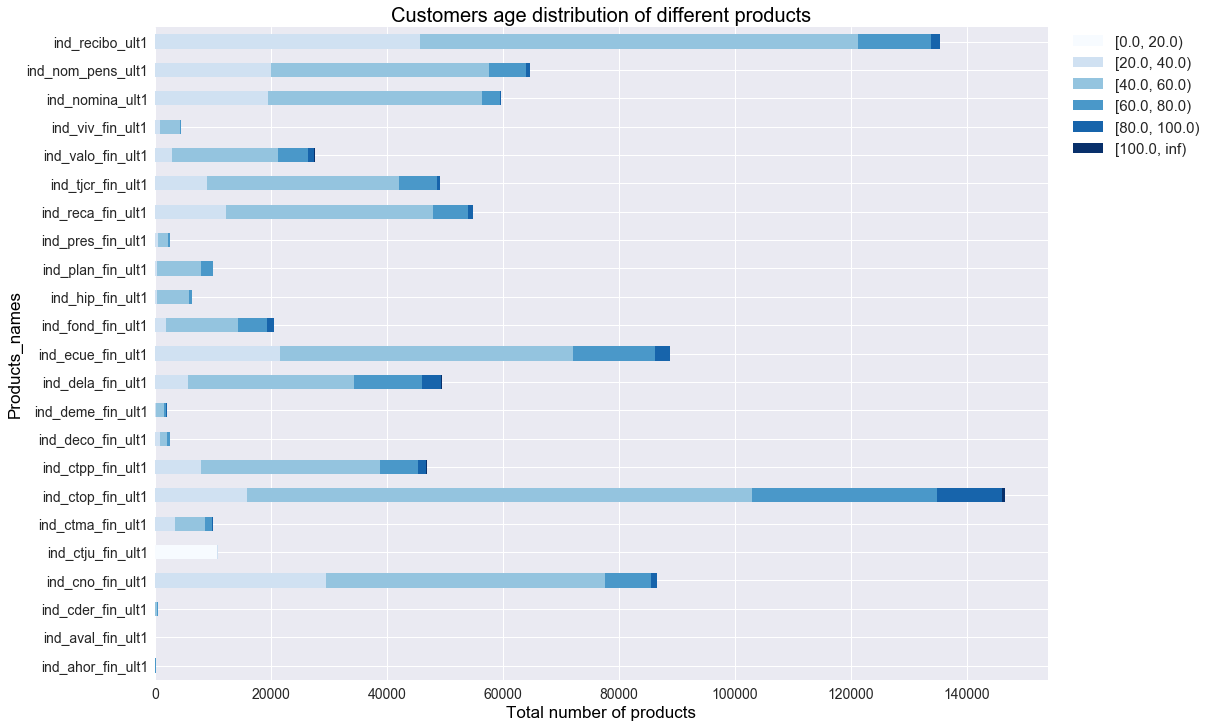

In [341]:
# Plot of customers' age distibution of each product (excluding the dominant product) 
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Blues')
plt.title('Customers age distribution of different products', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15}) 

### 由channel來看持有產品總數

In [342]:
df["canal_entrada"].value_counts().head(10)

KHE    327936
KAT    249630
KFC    232835
KFA     30669
KHK     17040
KHQ     11309
KHD      9011
KAS      6596
KAG      5574
RED      5224
Name: canal_entrada, dtype: int64

In [343]:
# Let's extract the necessary columns for this step
df_a = df.loc[:, ['canal_entrada']].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [344]:
# Let's subset the data to keep only the records from the five major channels
subset = ["KHE", "KAT", "KFC", "KFA", "KHK"]
df_a = df_a.loc[df_a['canal_entrada'].isin(subset)]

### 抓取每個顧客在每個通路的次數

In [345]:
df_a = df_a.groupby("canal_entrada").agg("sum")
df_a = df_a.T

In [346]:
df_a

canal_entrada,KAT,KFA,KFC,KHE,KHK
ind_ahor_fin_ult1,49.0,0.0,20.0,0.0,0.0
ind_aval_fin_ult1,17.0,0.0,15.0,0.0,0.0
ind_cco_fin_ult1,150164.0,17757.0,140466.0,295977.0,11093.0
ind_cder_fin_ult1,253.0,9.0,129.0,0.0,17.0
ind_cno_fin_ult1,36144.0,4500.0,28408.0,5535.0,1677.0
ind_ctju_fin_ult1,3394.0,1122.0,6191.0,0.0,0.0
ind_ctma_fin_ult1,2414.0,741.0,4628.0,8.0,370.0
ind_ctop_fin_ult1,67944.0,6119.0,47387.0,0.0,0.0
ind_ctpp_fin_ult1,21714.0,3127.0,13957.0,0.0,0.0
ind_deco_fin_ult1,351.0,56.0,291.0,3.0,951.0


### 畫出每個通路的顧客總數

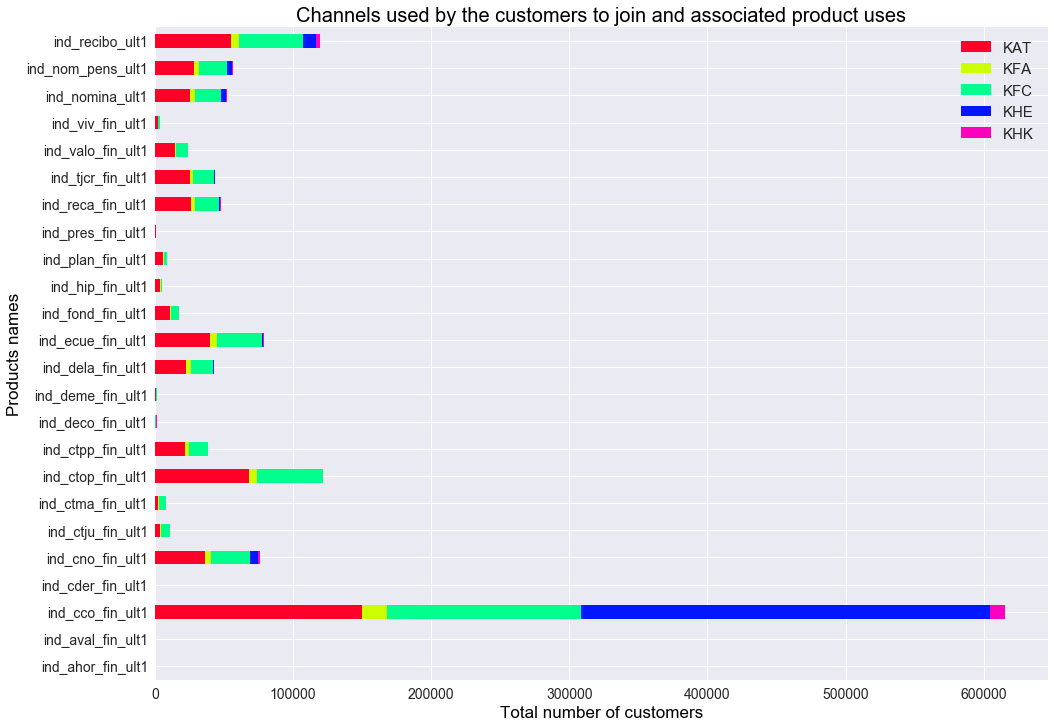

In [347]:
# Channels used by the customer to join and the purchased products
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Channels used by the customers to join and associated product uses', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

###  去除活存帳戶，再畫一次。

In [348]:
# exclude the dominant product "ind_cco_fin_ult1"
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

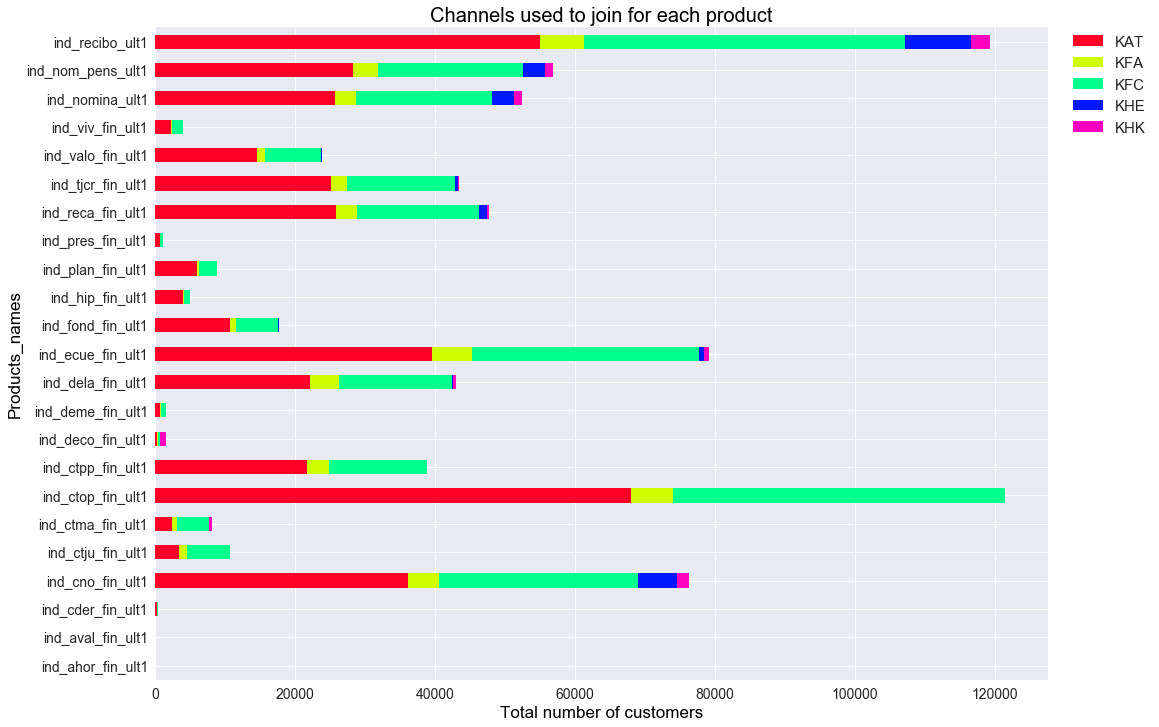

In [349]:
# Channels share distribution of each product, excluding the dominant product
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Channels used to join for each product', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(["KAT", "KFA", "KFC", "KHE", "KHK"], prop={'size':15}, loc=1) 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15})

### 以顧客資歷分群

In [350]:
# Let's extract the necessary columns for this step
df_a = df.loc[:, ['antiguedad']].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [351]:
# Let's create seniority groups
df_a = (df_a.groupby(pd.cut(df_a['antiguedad'], [0,50,100,150,200, pd.np.inf], right=False))
                     .sum())

In [352]:
df_a.head()

,antiguedad,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
antiguedad,,,,,,,,,,,,,,,,,,,,,,,,,
"[0.0, 50.0)",12880197.0,0,0,410597,39,28002,2832,3340,28,9,2080,66,9270,29778,1987,52,462,68,7914,6607,1808,0,17945.0,19044.0,47080
"[50.0, 100.0)",8452237.0,0,15,66043,84,10020,1967,6418,3334,20457,105,411,9840,10115,2219,59,671,754,7162,6628,2897,219,6880.0,7399.0,15424
"[100.0, 150.0)",18334050.0,28,0,91999,147,15287,4557,104,47777,8639,157,748,10326,15128,4097,1898,1727,1150,12822,10604,5163,1232,10734.0,11564.0,23686
"[150.0, 200.0)",28875698.0,59,17,96705,101,23351,1489,97,81795,12369,231,670,15075,24871,7720,3137,4149,467,18797,17680,11372,1980,16794.0,18496.0,34325
"[200.0, inf)",11062135.0,20,0,29283,99,9872,0,65,13726,5389,56,160,4928,8936,4562,1330,2999,122,8246,7571,6304,1058,7290.0,8239.0,14872


In [353]:
exclude = ["antiguedad"]
df_a = df_a.drop(exclude, axis=1).T

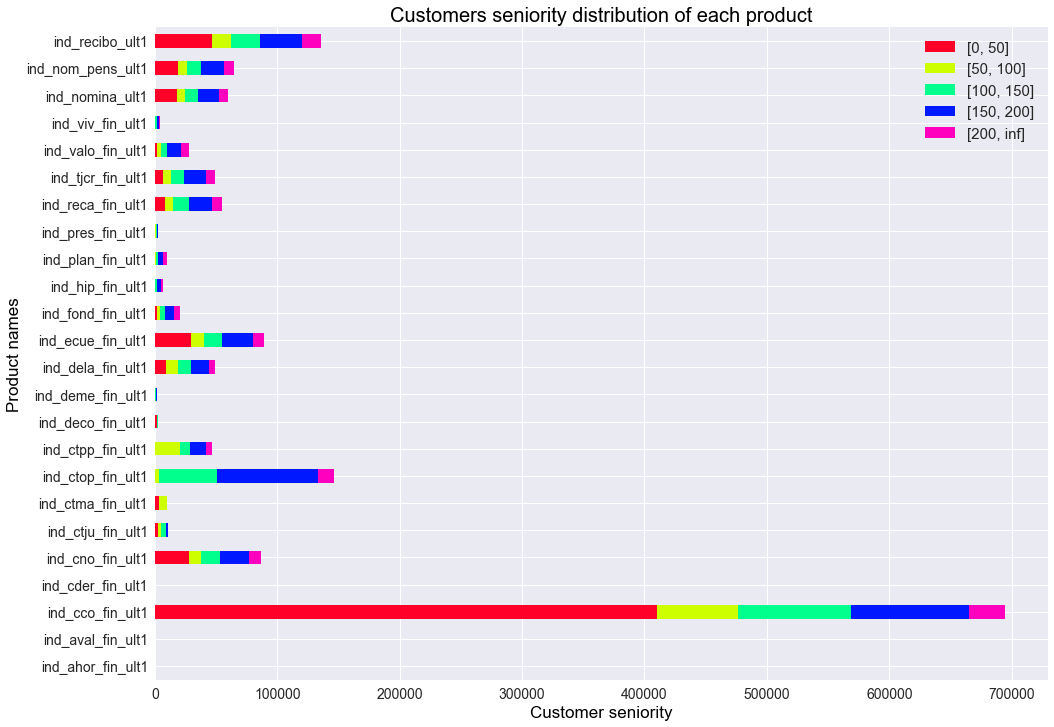

In [354]:
# Customers' seniority distribution of each product
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Customers seniority distribution of each product', fontsize=20, color='black') 
plt.xlabel('Customer seniority', fontsize=17, color='black') 
plt.ylabel('Product names', fontsize=17, color='black') 
plt.legend([[0, 50], [50, 100], [100, 150], [150, 200], [200, inf]], prop={'size':15}) 

In [355]:
# exclude the dominant product "ind_cco_fin_ult1"
exclude = ['ind_cco_fin_ult1']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

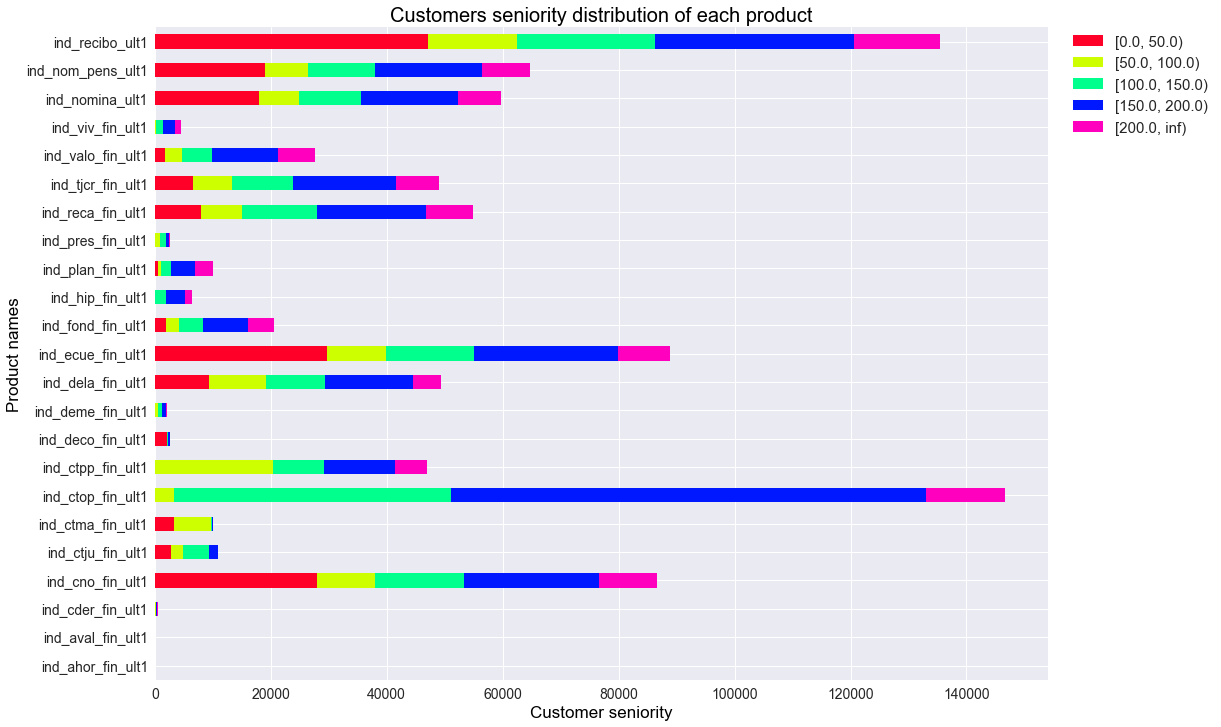

In [356]:
# Customers' seniority distribution of each product
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Customers seniority distribution of each product', fontsize=20, color='black') 
plt.xlabel('Customer seniority', fontsize=17, color='black') 
plt.ylabel('Product names', fontsize=17, color='black') 
plt.legend([[0, 50], [50, 100], [100, 150], [150, 200], [200, inf]], prop={'size':15}) 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15})

### 來看看每個月份個人戶有多少產品

In [357]:
# Extract total number of products 
df_a = df["tot_products"].value_counts()
df_a = pd.DataFrame(df_a)

In [358]:
df["ncodpers"].count()

984017

### 計算使用不同數量產品的客戶的百分比

In [359]:
# calculate the percentage of customers using different number of products
count = df["ncodpers"].count()
df_a["percentage"] = (df_a["tot_products"]/count)*100
df_a

,tot_products,percentage
1.0,552530,56.150453
2.0,150950,15.340182
0.0,120166,12.211781
3.0,62106,6.311476
4.0,35979,3.656339
5.0,23082,2.345691
6.0,17182,1.746108
7.0,11452,1.163801
8.0,6197,0.629766
9.0,2728,0.277231


56.21％的客戶只使用一種產品，15.37％的客戶使用兩種產品，另有12.25％的客戶沒有使用任何產品。

### 探索只擁有一樣產品的顧客

In [360]:
# extract those customers who purchased only one product had being current account ("ind_cco_fin_ult1") 
df_a = df[df["tot_products"]==1]  
df_a = df_a[df_a["ind_cco_fin_ult1"]==1] 

In [361]:
a = df_a["ncodpers"].count() # Observations where customers had only one product being the current account 
b = len(df) # Total number of observations
c = len(df[df["tot_products"]==1]) # Observations where customers had only one account

print("%.2f" % ((c/b)*100), "% of the customers had purchased only one product") 
print("%.2f" % ((a/b)*100), "% of the customers had the current account as the only one product") 
print("%.2f" % ((47.12/55.74)*100), "% of the customers when they have only one product, this product is the current account")

56.15 % of the customers had purchased only one product
47.42 % of the customers had the current account as the only one product
84.54 % of the customers when they have only one product, this product is the current account


* 56.21％的客戶只購買了一種產品</br>
* 47.48％的客戶唯一的一個產品是活存帳戶</br>
* 在顧客只有一個產品的條件下，這個產品 84.54％是活存帳戶</br>

In [362]:
print("%.2f" % (55.74 - 47.12 ), "% of the customers have only one account being not the current account") 

8.62 % of the customers have only one account being not the current account


8.62 %的顧客只擁有一樣產品且並非活存帳戶

In [363]:
# extract the necessary columns
df_a = df[df["tot_products"]==1]  # cases where the total products is one
df_a = df_a.loc[:, ["tot_products"]].join(df_a.loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"]) 

In [364]:
df_a = df_a.groupby("tot_products").agg("sum")
df_a = df_a.T

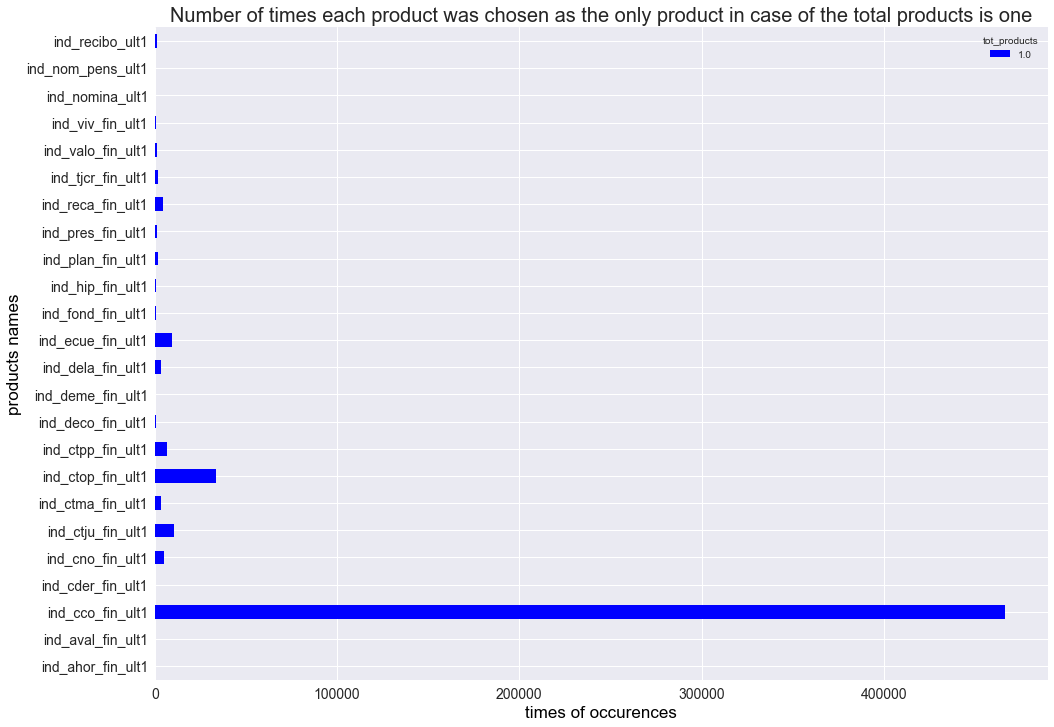

In [365]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='winter')
plt.title('Number of times each product was chosen as the only product in case of the total products is one', fontsize=20) 
plt.xlabel('times of occurences', fontsize=17, color='black') 
plt.ylabel('products names', fontsize=17, color='black')

當顧客只有一件產品時，絕大部分都是擁有活存帳戶

### 篩選購買兩樣產品的顧客，且其中一樣為活存帳戶

In [366]:
# extract those customers who purchased two products with current account being one of them
df_a = df[df["tot_products"]==2]  
df_a = df_a[df_a["ind_cco_fin_ult1"]==1]  

In [367]:
df_a["ncodpers"].count()

136924

來看看哪些產品是會與主導產品一起被選擇的

In [368]:
# extract the necessary columns
df_a = df_a.loc[:, ["tot_products"]].join(df_a.loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"]) 

In [369]:
df_a = df_a.groupby("tot_products").agg("sum")
df_a = df_a.T

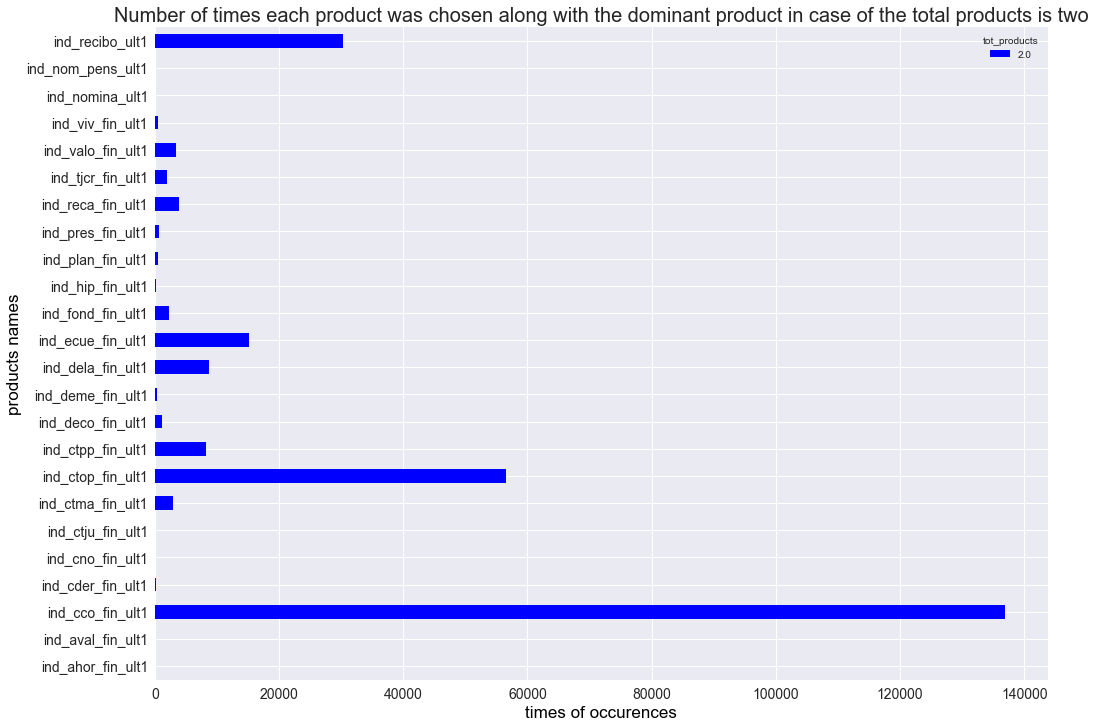

In [370]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='winter')
plt.title('Number of times each product was chosen along with the dominant product in case of the total products is two', fontsize=20) 
plt.xlabel('times of occurences', fontsize=17, color='black') 
plt.ylabel('products names', fontsize=17, color='black') 

### 篩選未買任何產品的顧客

In [371]:
# extract those customers who did not purchase any products in any month
df_a = df[df["tot_products"]==0]

In [372]:
df_a["ind_actividad_cliente"].value_counts() 

0.0    118977
1.0      1189
Name: ind_actividad_cliente, dtype: int64

大部分均為非活躍戶

### 篩選在任何一個月內購買三個產品的顧客

In [373]:
# extract those customers who purchased three products in any single month
df_a = df[df["tot_products"]==3]  

In [374]:
df_a = df_a.loc[:, ["tot_products"]].join(df_a.loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"]) 

In [375]:
df_a = df_a.groupby("tot_products").agg("sum")
df_a = df_a.T

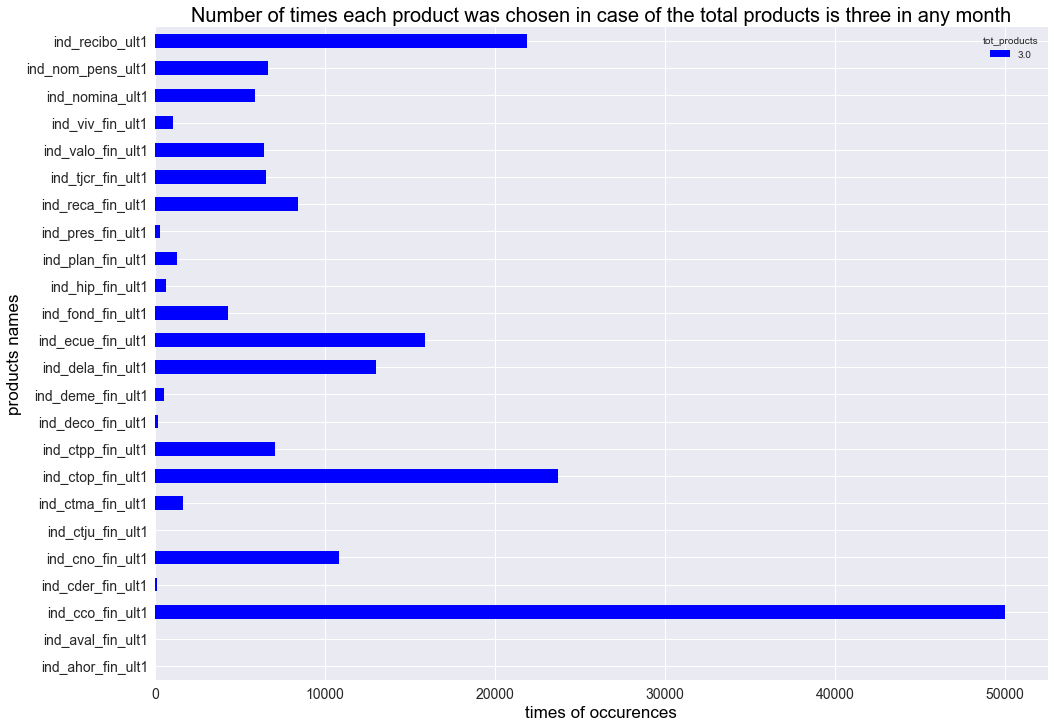

In [376]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='winter')
plt.title('Number of times each product was chosen in case of the total products is three in any month', fontsize=20, color='black') 
plt.xlabel('times of occurences', fontsize=17, color='black') 
plt.ylabel('products names', fontsize=17, color='black')

### 按照產品總數進行分類

In [377]:
# Categorize by total products
df_a = df.loc[:, ["tot_products"]].join(df.loc[:, "ind_ahor_fin_ult1":"ind_recibo_ult1"]) 
df_a = df_a.groupby("tot_products").agg("sum")
df_a = df_a.T

In [378]:
df_a.head()

tot_products,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,15.0
ind_ahor_fin_ult1,0.0,0.0,40.0,29.0,11.0,21.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ind_aval_fin_ult1,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,15.0,0.0,0.0,8.0,0.0,0.0,0.0
ind_cco_fin_ult1,0.0,466613.0,136924.0,50018.0,20609.0,9057.0,4482.0,2945.0,2138.0,1043.0,504.0,229.0,48.0,10.0,7.0
ind_cder_fin_ult1,0.0,18.0,150.0,102.0,61.0,43.0,17.0,14.0,17.0,26.0,3.0,10.0,9.0,0.0,0.0
ind_cno_fin_ult1,0.0,5119.0,6158.0,10802.0,15239.0,14777.0,14164.0,10330.0,5728.0,2613.0,1105.0,383.0,91.0,16.0,7.0


### 在任何一個月只購買一個產品的顧客中各產品的貢獻百分比

In [379]:
# percentage of each product contribution of those customers who only purchased one product in any month
a = df_a[1]
b = df_a[1].sum()
c = (a/b)*100
c = c.sort_values(ascending=False)
c

ind_cco_fin_ult1     84.450256
ind_ctop_fin_ult1     6.040577
ind_ctju_fin_ult1     1.945234
ind_ecue_fin_ult1     1.737462
ind_ctpp_fin_ult1     1.245000
ind_cno_fin_ult1      0.926466
ind_reca_fin_ult1     0.784392
ind_dela_fin_ult1     0.647567
ind_ctma_fin_ult1     0.564494
ind_tjcr_fin_ult1     0.291206
ind_plan_fin_ult1     0.262067
ind_recibo_ult1       0.243426
ind_valo_fin_ult1     0.203247
ind_pres_fin_ult1     0.165783
ind_deco_fin_ult1     0.137368
ind_viv_fin_ult1      0.131939
ind_fond_fin_ult1     0.131396
ind_hip_fin_ult1      0.079996
ind_deme_fin_ult1     0.004706
ind_nom_pens_ult1     0.004163
ind_cder_fin_ult1     0.003258
ind_nomina_ult1       0.000000
ind_aval_fin_ult1     0.000000
ind_ahor_fin_ult1     0.000000
Name: 1.0, dtype: float64

In [380]:
c[0]

84.450256094691696

In [381]:
print("Wow, about", "%.2f" % (c[0]), "% of the customers purchase only the current account in case they purchase only one product.") 

Wow, about 84.45 % of the customers purchase only the current account in case they purchase only one product.


活存帳戶貢獻比例大約84.46 %

### 在任何一個月購買兩個產品的顧客中各產品的貢獻百分比

In [382]:
# percentage of each product contribution of those customers who purchased two products in any month
a = df_a[2]
b = df_a[2].sum()
c = (a/b)*100
c = c.sort_values(ascending=False)
c

ind_cco_fin_ult1     45.354091
ind_ctop_fin_ult1    19.905267
ind_recibo_ult1      11.363365
ind_ecue_fin_ult1     6.209010
ind_dela_fin_ult1     3.916529
ind_ctpp_fin_ult1     3.120570
ind_reca_fin_ult1     2.081484
ind_cno_fin_ult1      2.039748
ind_valo_fin_ult1     1.287844
ind_ctma_fin_ult1     1.080159
ind_fond_fin_ult1     1.005962
ind_tjcr_fin_ult1     0.897317
ind_deco_fin_ult1     0.408745
ind_pres_fin_ult1     0.296456
ind_plan_fin_ult1     0.286519
ind_viv_fin_ult1      0.221928
ind_nom_pens_ult1     0.190460
ind_deme_fin_ult1     0.144419
ind_hip_fin_ult1      0.061610
ind_cder_fin_ult1     0.049685
ind_nomina_ult1       0.037098
ind_ctju_fin_ult1     0.028486
ind_ahor_fin_ult1     0.013249
ind_aval_fin_ult1     0.000000
Name: 2.0, dtype: float64

In [383]:
print("In case of two products purchased by the customer, about", "%.2f" % (c[0]), "% of the customers have got a (current account) and in", "%.2f" %(c[1]),"% of the cases it is combined with (Particular Account) and in", "%.2f"% (c[2]),"% of the cases it is combined with (Direct Debit)") 

In case of two products purchased by the customer, about 45.35 % of the customers have got a (current account) and in 19.91 % of the cases it is combined with (Particular Account) and in 11.36 % of the cases it is combined with (Direct Debit)


In [384]:
# percentage of each product contribution of those customers who purchased three products in any month
a = df_a[3]
b = df_a[3].sum()
c = (a/b)*100
c.sort_values(ascending=False)

ind_cco_fin_ult1     26.845501
ind_ctop_fin_ult1    12.717504
ind_recibo_ult1      11.749267
ind_ecue_fin_ult1     8.530040
ind_dela_fin_ult1     6.989126
ind_cno_fin_ult1      5.797615
ind_reca_fin_ult1     4.511641
ind_ctpp_fin_ult1     3.786000
ind_nom_pens_ult1     3.563800
ind_tjcr_fin_ult1     3.494563
ind_valo_fin_ult1     3.440891
ind_nomina_ult1       3.160188
ind_fond_fin_ult1     2.314323
ind_ctma_fin_ult1     0.900074
ind_plan_fin_ult1     0.686461
ind_viv_fin_ult1      0.561942
ind_hip_fin_ult1      0.342962
ind_deme_fin_ult1     0.274799
ind_pres_fin_ult1     0.147060
ind_deco_fin_ult1     0.110027
ind_cder_fin_ult1     0.054745
ind_ahor_fin_ult1     0.015565
ind_ctju_fin_ult1     0.005904
ind_aval_fin_ult1     0.000000
Name: 3.0, dtype: float64

### 顧客選擇的驅動因素

現在我們要看看是什麼推動了客戶的選擇，特別是沒有購買活存帳戶的客戶，這些客戶貢獻了一半以上的產品。 讓我們看看這些產品是什麼，並分析可能有助於客戶購買行為的功能。

### 以年齡做分群的產品分佈

In [385]:
df_a = df.loc[:, ['age']].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [386]:
df_a = (df_a.groupby(pd.cut(df_a['age'], [0,18,25,35,45,55, pd.np.inf], right=False))
                     .sum())

In [387]:
df_a.head()

,age,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
age,,,,,,,,,,,,,,,,,,,,,,,,,
"[0.0, 18.0)",120591.0,0,0,0,0,0,9070,0,0,0,0,0,42,0,0,0,0,0,0,0,0,0,10.0,42.0,0
"[18.0, 25.0)",5410409.0,0,0,212305,0,3707,1766,238,1060,0,37,0,257,3110,143,0,0,7,418,301,186,0,1727.0,1924.0,6824
"[25.0, 35.0)",4934085.0,0,9,138442,0,14764,9,1348,4862,2377,248,99,1758,8183,624,46,96,177,4662,3225,1010,105,10065.0,10197.0,21317
"[35.0, 45.0)",7718790.0,39,23,120874,111,26958,0,4048,36904,16271,1033,587,11310,26153,3642,2138,1736,848,19275,15500,6619,2269,19772.0,19979.0,43920
"[45.0, 55.0)",8796705.0,58,0,108955,179,26156,0,2399,46442,16044,678,759,15704,26525,7114,3139,4623,894,18873,18298,10384,1630,20233.0,20650.0,40223


In [388]:
del df_a["age"]

In [389]:
df_a = df_a.T

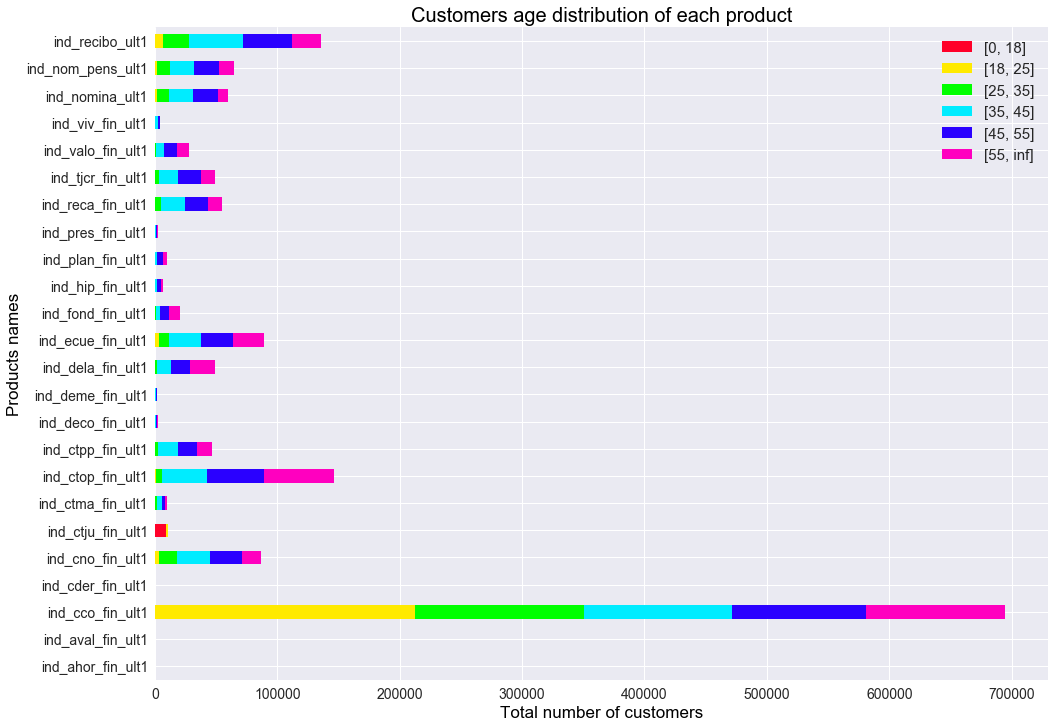

In [390]:
# Customers age distribution of each product
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Customers age distribution of each product', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend([[0, 18], [18, 25], [25, 35], [35, 45], [45, 55], [55, inf]], prop={'size':15}) 

由圖可發現，18-25歲的顧客幾乎都集中在購買活存帳戶，在其他產品別比例明顯偏少

In [391]:
df_a = df.loc[:,["age"]].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [392]:
fnc = {c:'sum' for c in df_a.columns.drop(['age']).tolist()}
     ...: fnc['age'] = 'mean'
     ...: 

In [393]:
df_a = df_a.groupby('age').agg(fnc).reindex_axis(df_a.columns.drop('age'), 1)

In [394]:
df_a.head(50)

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
age,,,,,,,,,,,,,,,,,,,,,,,,
2.0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3.0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4.0,0,0,0,0,0,142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0
5.0,0,0,0,0,0,177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6.0,0,0,0,0,0,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
7.0,0,0,0,0,0,275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
8.0,0,0,0,0,0,461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,6.0,0
9.0,0,0,0,0,0,472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5.0,0
10.0,0,0,0,0,0,552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3.0,0


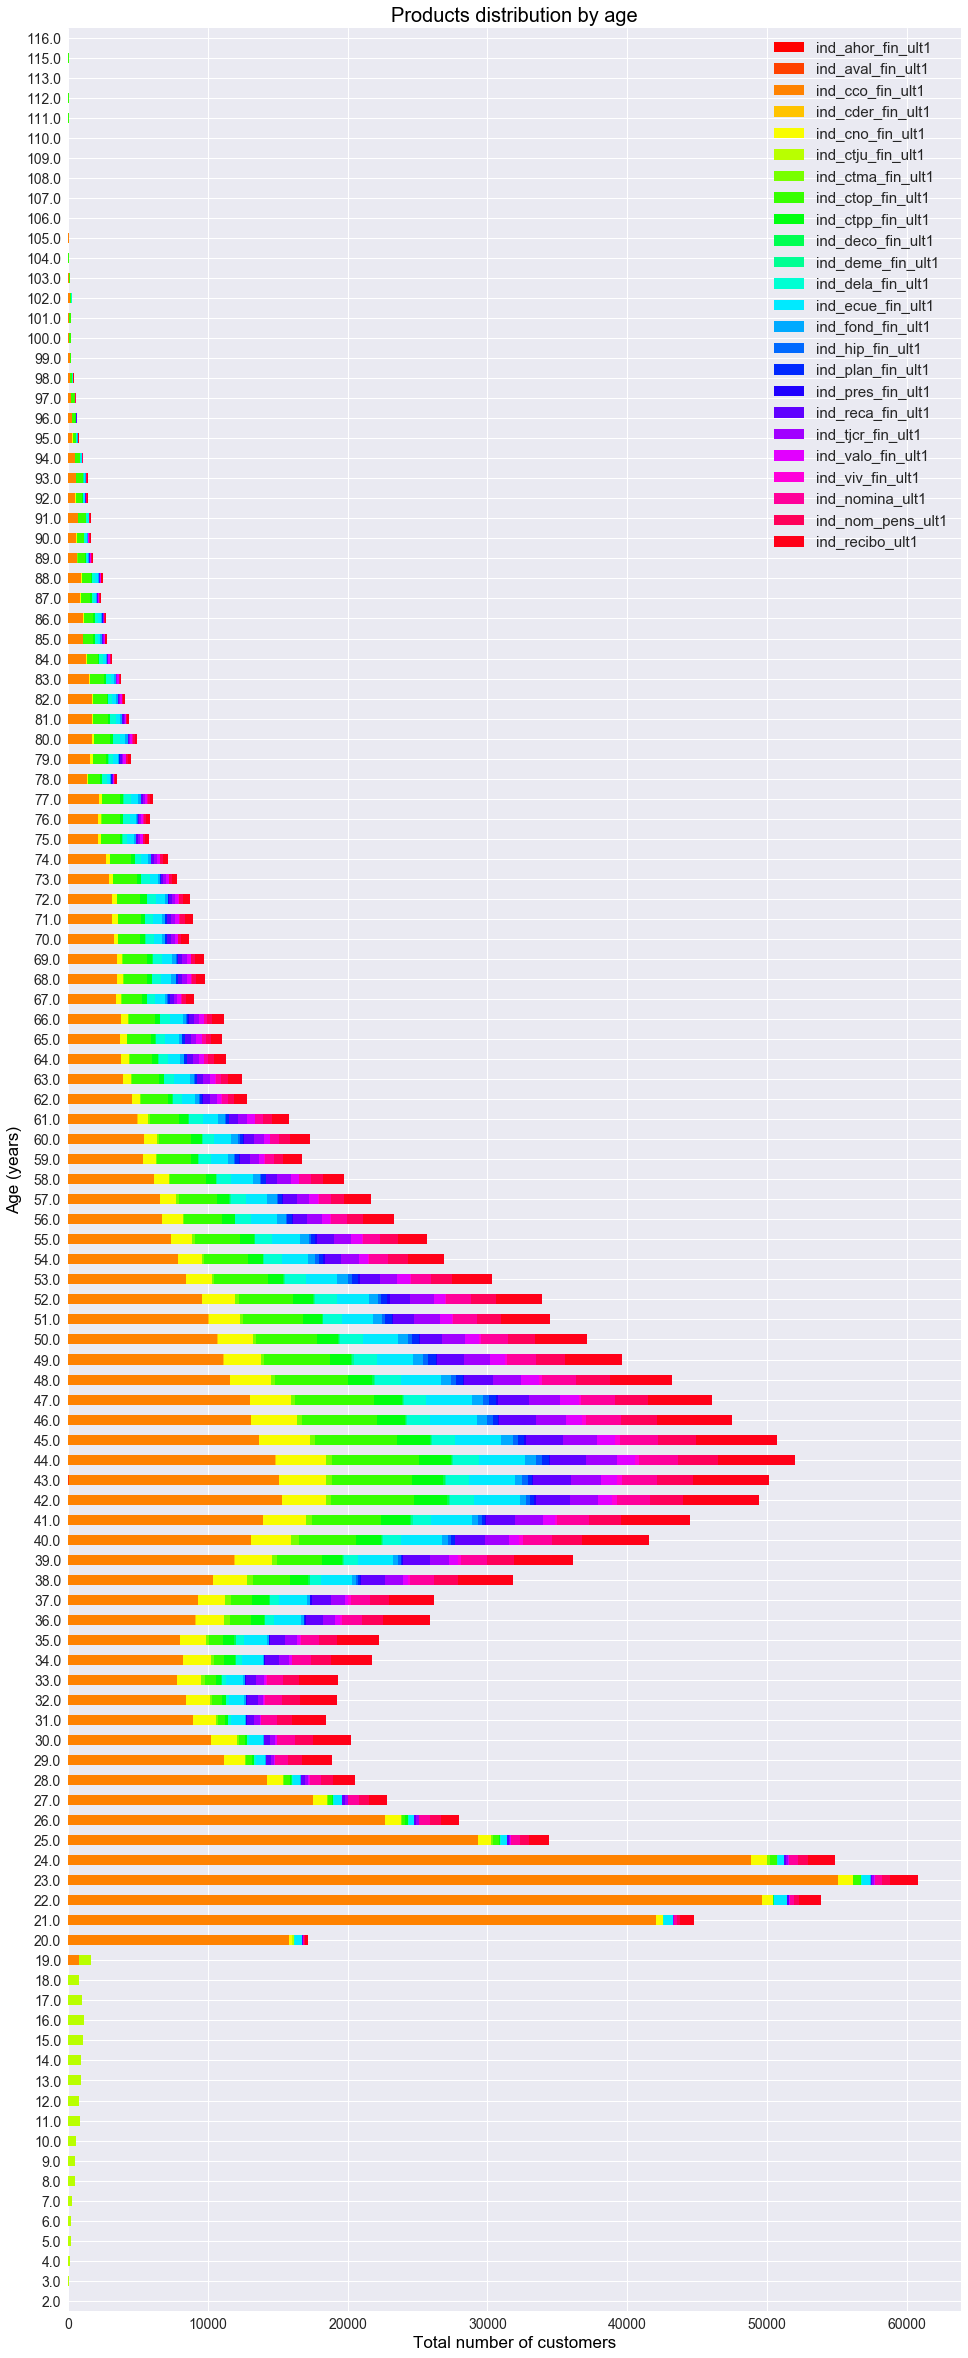

In [395]:
# Products distribution by age
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,42], colormap='hsv')
plt.title('Products distribution by age', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Age (years)', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

* 18歲以前都只有Junior Account</br>
* 20歲到28歲是擁有活存帳戶的高峰期</br>
* 30歲後其他產品的佔比會開始超過一半，並慢慢增加</br>

### 依顧客類型分群（01 - VIP, 02 - Individuals 03 - college graduated）

In [396]:
df_a = df.loc[:, ['segmento']].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [397]:
df_a = df_a.groupby("segmento").agg("sum")
df_a = df_a.T

In [398]:
df_a.head()

segmento,01 - TOP,02 - PARTICULARES,03 - UNIVERSITARIO
ind_ahor_fin_ult1,8.0,99.0,0.0
ind_aval_fin_ult1,26.0,6.0,0.0
ind_cco_fin_ult1,26958.0,348755.0,318914.0
ind_cder_fin_ult1,86.0,384.0,0.0
ind_cno_fin_ult1,13994.0,60028.0,12510.0


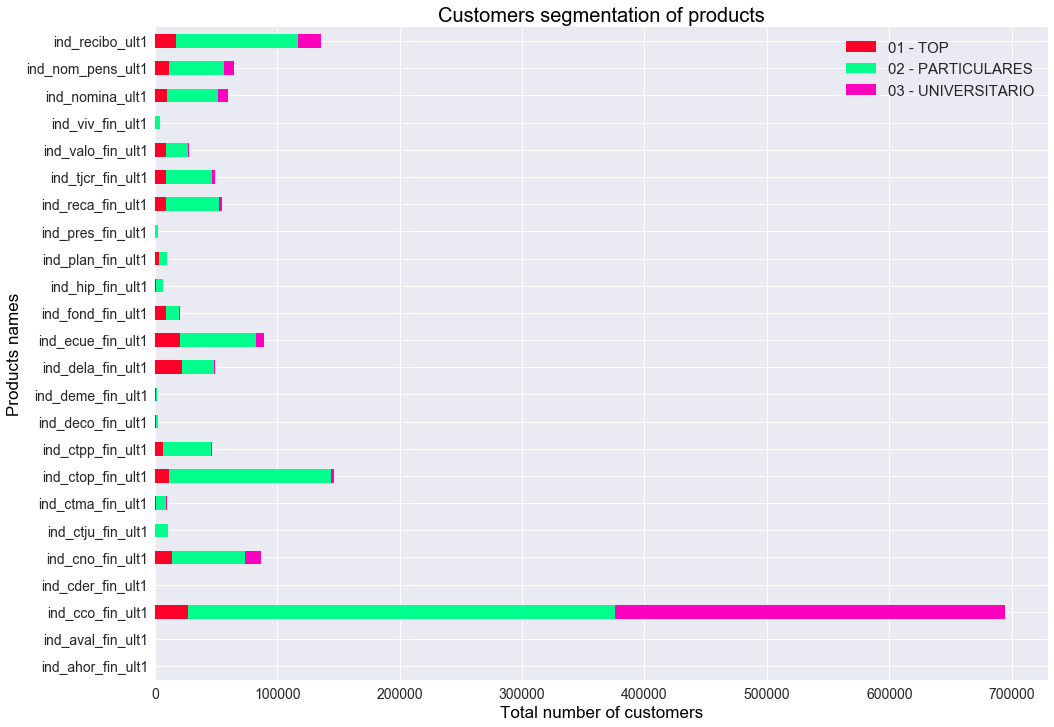

In [399]:
# Customers segment of each product
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Customers segmentation of products', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

In [400]:
# Let's extract the necessary columns for this step
df_a = df.loc[:, ['ind_actividad_cliente']].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [401]:
df_a = df_a.groupby("ind_actividad_cliente").agg("sum")
df_a = df_a.T

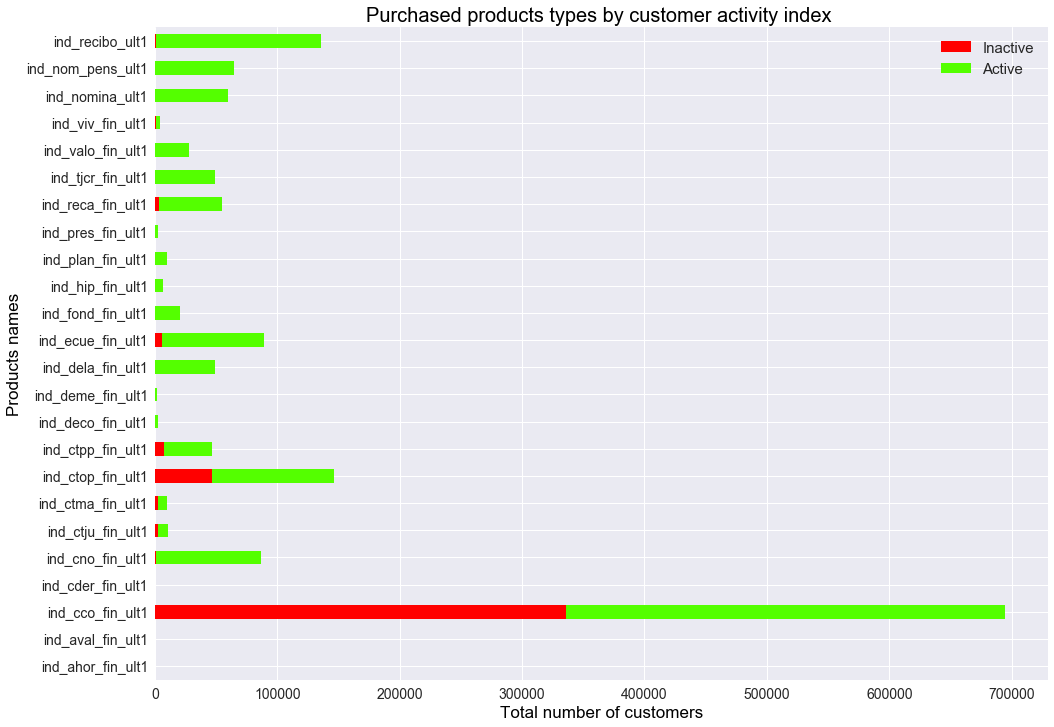

In [402]:
# Purchased products types by customer activity index
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Purchased products types by customer activity index ', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(["Inactive", "Active"], prop={'size':15}) 

* 非活動戶幾乎都為Current Accounts或particular Account</br>
* 顧客是否為活動戶對Current Accounts和particular Account影響不大</br>

### 性別對產品的分佈

In [403]:
# Let's extract the necessary columns for this step
df_a= df.loc[:, ['sexo']].join(df.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])

In [404]:
df_a = df_a.groupby("sexo").agg("sum")
df_a = df_a.T

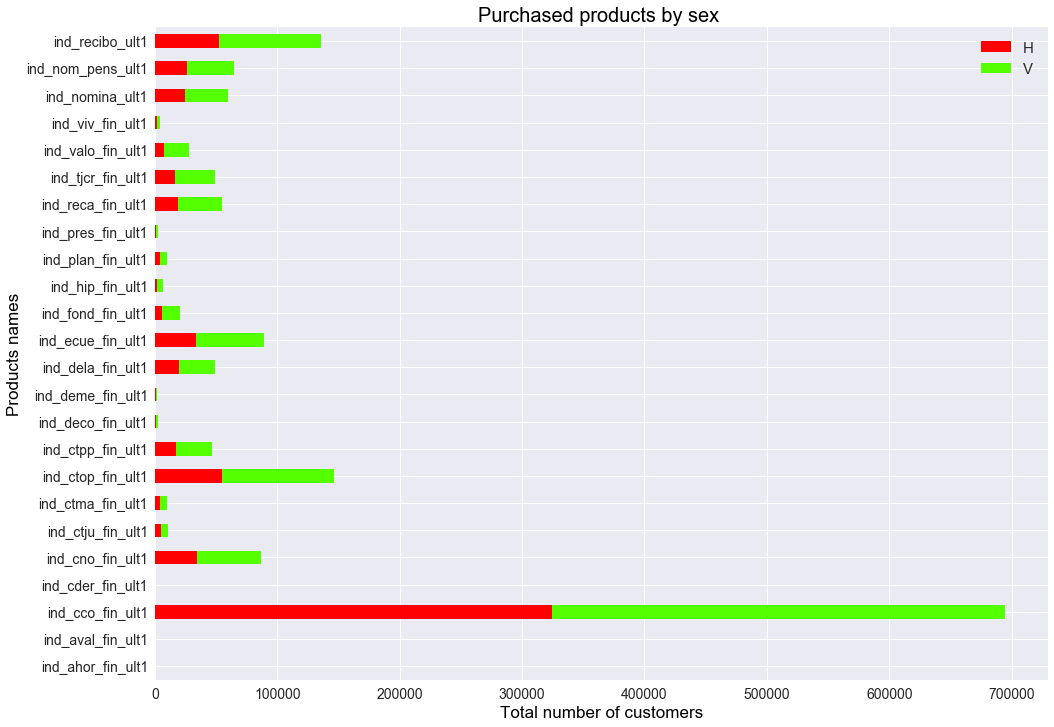

In [405]:
# Percentage of purchased products by sex
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Purchased products by sex ', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

In [406]:
df["sexo"].value_counts()

V    539299
H    444718
Name: sexo, dtype: int64

In [407]:
a = df["ncodpers"][df["sexo"]=="H"].count()
b = df["ncodpers"][df["sexo"]=="V"].count()
(a/b)*100

82.462233380740557

性別Ｈ顧客數量較少，因此購買產品較低

### 探索年齡、收入、資歷與各產品的關係

In [408]:
df_a = df.loc[:, ['age', 'renta', 'antiguedad']].join(df.loc[:, 'ind_ahor_fin_ult1':'tot_products'])

In [409]:
df_a.head()

,age,renta,antiguedad,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,tot_products
526434,41.0,90228.24,177.0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0.0,0.0,1,7.0
120640,21.0,134256.66,12.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
120639,24.0,141687.78,12.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
120634,21.0,123629.01,12.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
525691,88.0,110355.96,164.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0


In [410]:
df_a = df_a.dropna(axis=0)

In [411]:
df_a = df_a.groupby("tot_products").agg("mean")

In [412]:
df_b = df_a.loc[:, ['age', 'renta', 'antiguedad']]

In [413]:
df_b.head()

,age,renta,antiguedad
tot_products,,,
0.0,43.530791,133438.852910,88.913162
1.0,34.904324,118081.051403,58.994438
2.0,48.886910,138777.902001,104.850739
3.0,48.763340,142474.477656,116.968200
4.0,47.375135,147369.747901,117.798660


In [414]:
df_a = df_b["antiguedad"][0:10]

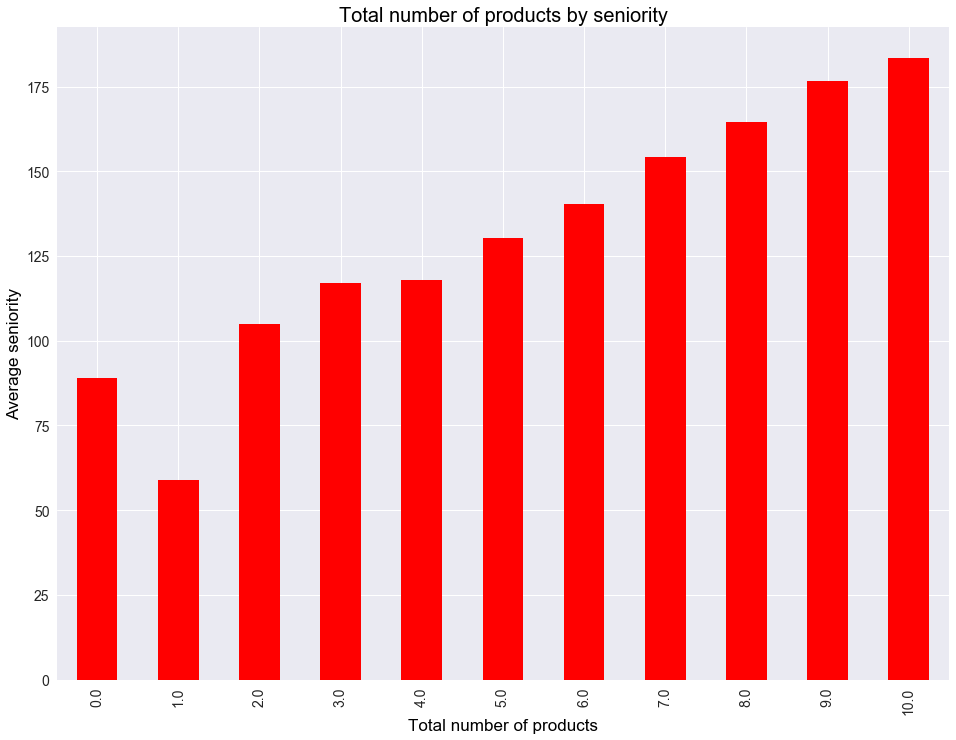

In [415]:
# Total number of products by seniority
df_a.plot(kind='bar', fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Total number of products by seniority', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Average seniority', fontsize=17, color='black') 
#plt.legend(prop={'size':15}) 

由圖可看出資歷與購買產品數為正相關，但沒有任何產品的顧客除外

In [416]:
df_a = df_b["age"]

In [417]:
df_a = df_b["renta"]

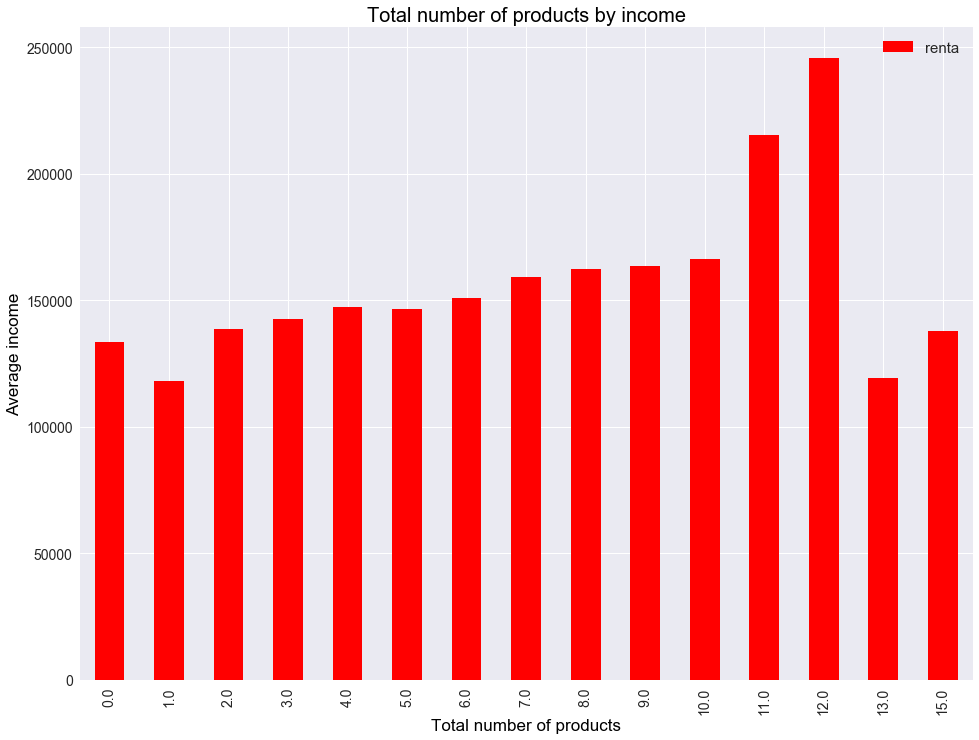

In [418]:
# Total number of products by income
df_a.plot(kind='bar', fontsize=14, figsize=[16,12], colormap='prism')
plt.title('Total number of products by income', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Average income', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

在擁有產品為0~13時，平均收入與擁有產品數並無明顯關聯，但擁有產品數為14時平均收入明顯暴增

### Finish